###Task2 Research

####BKP Horn, Robot Vision
Assuming a simple situation in which the surface orientantion does not play a role - a scene composed of a group of patches of *constant reflectivity*. (Such an arrangment is sometimes referred to as *Mondrian*)

In this simple situation, the scene radiance is propotional to the product of the irradiance falling on the object and the reflectance of the surface. $$b'(x,y)=r'(x,y) \cdot e'(x,y)$$

Our task is to separate the two contributions to the spatial variation in image irradiance.

**Assumptions**
- $r'(x,y)$ is constant within a patch, and has sharp discontinuities at edges between patches.
- $e'(x,y)$ varies smoothly, because, while the brightness of the incident light may vary from place to place, it will not do so abruptly.

**Expectations when a Fourier transform is taken**
- $\mathcal{F}(e'(x,y))$ will mostly have low frequencies
- $\mathcal{F}(r'(x,y))$ will *also* have high frequencies

Our plan now is to produce an intermediate result in which the contribution of one of the two components of image irradiance is increased relative to the other, so that we can remove the weaker one.

**Use**
- Linear, shift invariant operations, so that they (the operations) can be inversed
- Rotationally symmetric operators, because edges at all orientations ought to be treated equally.

**Laplacian:** $$\nabla^2=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}$$

Also, to make it easier to work with, we take the logarithm of image brightness, to get: $$b(x,y)=r(x,y)+e(x,y)$$

Then we have: $$d=\nabla^2 b=\nabla^2 r + \nabla^2 e$$

**Expectations**
- $\nabla^2 e$ will have finite values, since $e$ varies smoothly. In fact is may be zero if $e$ varies linearly with $x$ and $y$.
- $\nabla^2 r$, while zero almost everywherem is "infinite" at the edges between patches.

In case of $\nabla^2 r$, each step edge gives rise to a doublet edge. There is a large positive impulse on the darker side of the edge, and a large negative impulse on the lighter side of the edge.

We then apply a non-linear "threshold" operator $T$ that discards all the finite values, retaining only the doublets. $$t = T(\nabla^2 r + \nabla^2 e) = \nabla^2 r$$

$r$ can now, theoretically, be recovered simply by integrating $t$. This is **Land's Retinex scheme**
***

***A lot of maths later***

**Process to follow**
- Take logarithm of image
- Take Laplacian of the logarithm
- Threshold the result
    + Use a finite filter, as we only need the sudden edges for $\nabla^2 r$
    + *TBD*
- Inverse transform the thresholded result by convolution with an appropriate Green's function
    + take Fourier transform
    + *TBD*
- Normalize by adding a constant so that the maximum equals zero
- Compute lightness (estimate of reflectance) by taking the antilogarithm
- The irradiance can be be estimated from the estimate of the reflectance.

***

In [1]:
from scipy.ndimage import *
import numpy as np
import src.image_io as image_io
from src.plot import plot_multiple_arrays
import matplotlib.pyplot as plt
%matplotlib inline

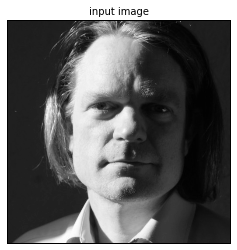

In [76]:
im = image_io.import_image("resources/portrait.png", as_array=True)
plot_multiple_arrays([[im]], "", ["input image"]);

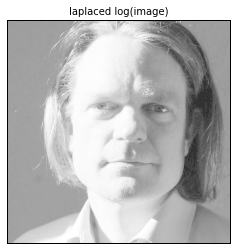

In [77]:
log_im = np.log(im + 1)  # dirty trick to avoid log(0)
filters.laplace(log_im)
plot_multiple_arrays([[log_im]], "", ["laplaced log(image)"]);

***

In [78]:
ln_im = np.log(im + 1)

In [79]:
from scipy.optimize import curve_fit
def func(X, a, b, c):
    return a*X[:,0] + b*X[:,1] + c

In [80]:
xdata = np.array([(x, y) for y in xrange(ln_im.shape[0]) for x in xrange(ln_im.shape[1])])
xdata.shape

(262144, 2)

In [81]:
res = curve_fit(func, xdata, np.ravel(ln_im))
res

(array([ -2.58677808e-03,   8.29576205e-04,   4.31154536e+00]),
 array([[  1.54874581e-10,  -7.80227021e-20,  -3.95704553e-08],
        [ -7.80226906e-20,   1.54874580e-10,  -3.95704551e-08],
        [ -3.95704553e-08,  -3.95704551e-08,   2.36037764e-05]]))

In [82]:
est = func(xdata, res[0][0], res[0][1], res[0][2])
est.shape

(262144,)

In [83]:
est_ = est.reshape(ln_im.shape)

In [84]:
from mpl_toolkits.mplot3d import Axes3D

In [85]:
X, Y = np.meshgrid(np.arange(est_.shape[1]), np.arange(est_.shape[0]))
X

array([[  0,   1,   2, ..., 509, 510, 511],
       [  0,   1,   2, ..., 509, 510, 511],
       [  0,   1,   2, ..., 509, 510, 511],
       ..., 
       [  0,   1,   2, ..., 509, 510, 511],
       [  0,   1,   2, ..., 509, 510, 511],
       [  0,   1,   2, ..., 509, 510, 511]])

ValueError: too many values to unpack

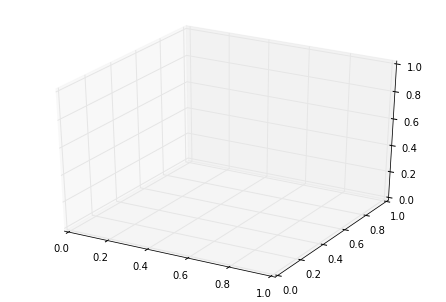

In [92]:
fig = plt.figure()
axs = Axes3D(fig)
axs.plot_wireframe(X, Y, [est_, ln_im])
plt.show()

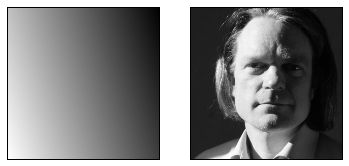

In [87]:
plot_multiple_arrays([[est_, im]], "", ["", ""])

In [74]:
est_.max()

5.4967737980788929